In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HR_ANALYSIS.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.drop('employee_id', axis = 1, inplace = True)

In [5]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [7]:
df = df.dropna(axis = 0)

In [8]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
df['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

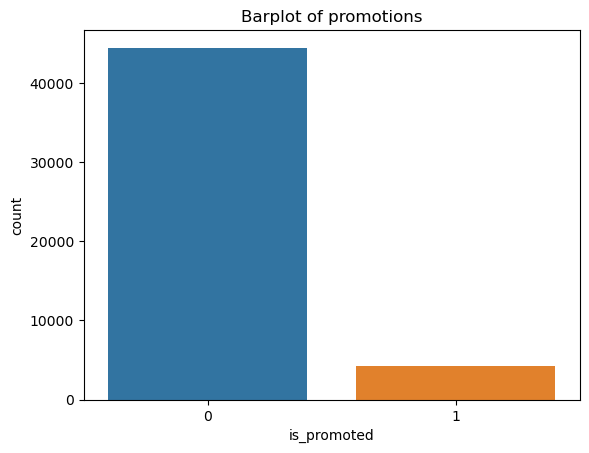

In [11]:
sns.countplot(x = 'is_promoted', data = df)
plt.title('Barplot of promotions')
plt.show()

/var/folders/rg/hgmrnb9d40z9frssbh59g5s80000gn/T/ipykernel_8567/3066571844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


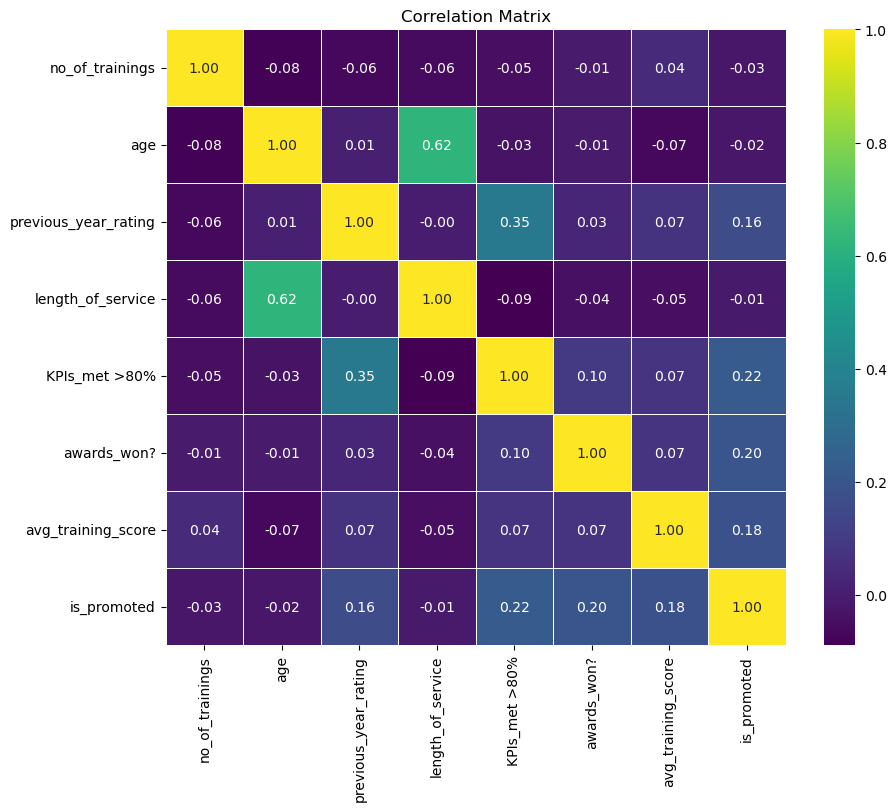

In [12]:
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
df['department'] = label_encoder.fit_transform(df['department'])
df['region'] = label_encoder.fit_transform(df['region'])
df['education'] = label_encoder.fit_transform(df['education'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['recruitment_channel'] = label_encoder.fit_transform(df['recruitment_channel'])

/var/folders/rg/hgmrnb9d40z9frssbh59g5s80000gn/T/ipykernel_8567/1641285131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = label_encoder.fit_transform(df['department'])
/var/folders/rg/hgmrnb9d40z9frssbh59g5s80000gn/T/ipykernel_8567/1641285131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = label_encoder.fit_transform(df['region'])
/var/folders/rg/hgmrnb9d40z9frssbh59g5s80000gn/T/ipykernel_8567/1641285131.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [16]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
def class_report(yt, yp):
    return pd.DataFrame(classification_report(yt, yp, output_dict = True)).transpose()

In [19]:
# Confusion Matrix function
def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    
    plt.figure(figsize = (4,4))
    sns.heatmap(cm, cmap = 'viridis', fmt = '0.2f', annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Apple Quality Classification')
    plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 0.81953619,  1.76864504,  1.50436696, ...,  1.34359879,
        -0.15391006, -1.10019636],
       [-0.38798019, -0.15845292, -0.67214112, ..., -0.7442698 ,
        -0.15391006, -0.2714691 ],
       [ 0.81953619, -0.61188773, -0.67214112, ..., -0.7442698 ,
        -0.15391006, -1.02485752],
       ...,
       [-0.38798019,  0.4083406 ,  1.50436696, ..., -0.7442698 ,
        -0.15391006, -0.57282447],
       [-1.99800204, -1.74547477, -0.67214112, ...,  1.34359879,
        -0.15391006,  1.15996889],
       [-1.19299112, -0.15845292, -0.67214112, ..., -0.7442698 ,
        -0.15391006, -1.10019636]])

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
model=GaussianNB()
model.fit(X_train,y_train)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [23]:
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
#accuracy_score of test and train dataset
accuracy_test= accuracy_score(y_test, y_pred_test)
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test,accuracy_train

(0.9127620221948212, 0.9109895191122072)

In [25]:
cm = confusion_matrix(y_test, y_pred_test)

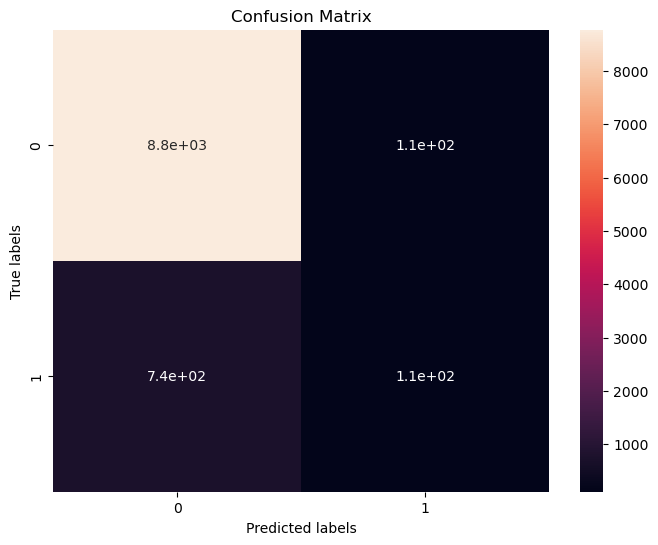

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
classification_error = 1 - accuracy_test
print("Classification Error:", classification_error)

Classification Error: 0.08723797780517883


In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8886
           1       0.49      0.13      0.21       846

    accuracy                           0.91      9732
   macro avg       0.71      0.56      0.58      9732
weighted avg       0.89      0.91      0.89      9732



In [29]:
class_probabilities = model.predict_proba(X_test)
probabilities_df = pd.DataFrame(class_probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])
print(probabilities_df)

      Probability_Class_0  Probability_Class_1
0            8.738286e-01             0.126171
1            9.992956e-01             0.000704
2            9.003617e-01             0.099638
3            9.986444e-01             0.001356
4            7.624453e-13             1.000000
...                   ...                  ...
9727         9.749456e-01             0.025054
9728         9.798182e-01             0.020182
9729         9.956579e-01             0.004342
9730         9.235745e-01             0.076425
9731         9.963991e-01             0.003601

[9732 rows x 2 columns]


array([[<Axes: title={'center': 'Probability_Class_0'}>,
        <Axes: title={'center': 'Probability_Class_1'}>]], dtype=object)

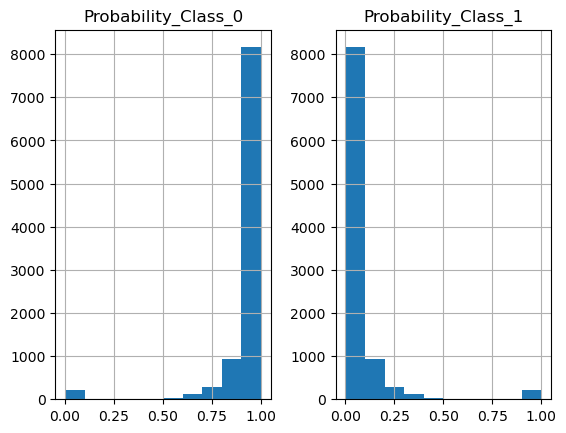

In [30]:
probabilities_df.hist()

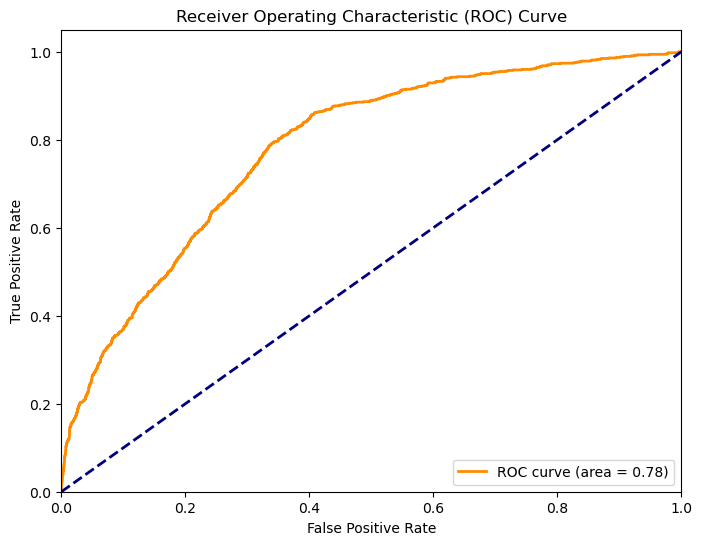

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7805657849439365


In [33]:
from sklearn.model_selection import cross_val_score
cv_roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("Cross-validated ROC AUC scores:", cv_roc_auc_scores)
print("Mean ROC AUC score:", cv_roc_auc_scores.mean())

Cross-validated ROC AUC scores: [0.77939792 0.79261006 0.77039679 0.78539836 0.79514537]
Mean ROC AUC score: 0.7845896993370116


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [34]:
cv_scores = cross_val_score(model, X_scaled, y, cv=10)
print("Cross-validated scores:", cv_scores)

Cross-validated scores: [0.91409782 0.90587752 0.91204275 0.90896013 0.90978216 0.91101521
 0.91368681 0.91039868 0.91656391 0.91039868]


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [35]:
print("Mean score:", np.mean(cv_scores))

Mean score: 0.9112823674475955


In [36]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
X_subset = X_scaled[:len(y_train)]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_train, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Build and compile the model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(X_train_scaled.shape[1],), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.5466 - loss: 1.3479
Epoch 2/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.7798 - loss: 0.5291
Epoch 3/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.9146 - loss: 0.3292
Epoch 4/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.9135 - loss: 0.3034
Epoch 5/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.9132 - loss: 0.2971
Epoch 6/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.9107 - loss: 0.3013
Epoch 7/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.9137 - loss: 0.2939
Epoch 8/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 0.9125 - loss: 0.2969
Epoch 9/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.9139 - loss: 0.2934
Epoch 10/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.9153 - loss: 0.2901
Epoch 11/5000
974/974 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.9128 - loss: 0.2961
Epoch 12

In [44]:
model.predict(X_test_scaled)

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step


array([[0.08095826],
       [0.08557012],
       [0.09224694],
       ...,
       [0.08945837],
       [0.07863058],
       [0.08788949]], dtype=float32)

In [45]:
y_test

,is_promoted
18825,0
52224,0
25748,0
48373,0
31587,0
...,...
4369,0
17772,0
4575,0
28009,0


In [46]:
coef, intercept = model.get_weights()

In [47]:
coef, intercept

(array([[-0.00432378],
        [-0.02217918],
        [-0.00370121],
        [ 0.02082928],
        [-0.01913476],
        [ 0.01442548],
        [ 0.02018093],
        [ 0.00048582],
        [-0.00946839],
        [-0.0221996 ],
        [ 0.00759986],
        [-0.02514496]], dtype=float32),
 array([-2.338412], dtype=float32))

In [48]:
def sigmoid(X) :
    import math
    return 1 / (1 + math.exp(-X))
sigmoid(18)

0.9999999847700205

In [49]:
X_test

array([[ 1.22204165,  1.76864504, -0.67214112, ...,  1.34359879,
        -0.15391006,  1.00929121],
       [ 0.01452527, -1.29203995,  1.50436696, ..., -0.7442698 ,
        -0.15391006,  0.33124163],
       [ 0.81953619, -0.15845292, -0.67214112, ...,  1.34359879,
        -0.15391006, -1.10019636],
       ...,
       [ 0.01452527,  0.2949819 , -0.67214112, ..., -0.7442698 ,
        -0.15391006,  0.40658047],
       [ 1.22204165, -0.49852903, -0.67214112, ...,  1.34359879,
        -0.15391006,  1.5366631 ],
       [ 0.81953619,  0.18162319, -0.67214112, ..., -0.7442698 ,
         6.49730098,  1.83801847]])

In [50]:
model.evaluate(X_test_scaled, y_test)

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.9160 - loss: 0.2886


[0.29072117805480957, 0.9152324795722961]